In [6]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
data = [[-1,2],[-0.5,6],[0,10],[1,18]]

# 数据归一化

In [3]:
ms = MinMaxScaler()
ms = ms.fit(data)
result = ms.transform(data)
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [4]:
ms.inverse_transform(result)

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

# 数据标准化

In [10]:
ss = StandardScaler()
ss.fit(data)

StandardScaler()

In [11]:
ss.mean_

array([-0.125,  9.   ])

In [12]:
ss.var_

array([ 0.546875, 35.      ])

In [14]:
x_std = ss.transform(data)

In [15]:
x_std

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [16]:
x_std.mean()

0.0

In [18]:
ss.inverse_transform(x_std)

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

# 缺失值处理

In [19]:
data = pd.read_csv("../data/Narrativedata.csv", index_col=0)
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [20]:
data.isnull().sum()

Age         177
Sex           0
Embarked      2
Survived      0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [22]:
# 中位数填充数据
data.loc[:, "Age"] = data.loc[:,"Age"].fillna(data.loc[:, "Age"].median())

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [24]:
data.dropna(inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       889 non-null    float64
 1   Sex       889 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  889 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.7+ KB


In [26]:
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


# 处理分类型特征：编码与哑变量

In [27]:
from sklearn.preprocessing import LabelEncoder

## 处理标签

In [28]:
y = data.iloc[:, -1]

In [29]:
le = LabelEncoder()
le = le.fit(y)
label = le.transform(y)

In [30]:
le.classes_

array(['No', 'Unknown', 'Yes'], dtype=object)

In [31]:
label

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,

In [32]:
le.inverse_transform(label)

array(['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Unknown', 'Yes', 'No', 'No', 'No', 'Unknown', 'No', 'Yes', 'No',
       'Yes', 'Unknown', 'Yes', 'Yes', 'Yes', 'No', 'Unknown', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Unknown', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Unknown', 'No', 'Unknown',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Unknown', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Unknown', 'No', 'No', 'Yes', 'No', 'No', 'Ye

In [33]:
# 上面步骤等价于
data.iloc[:, -1] = LabelEncoder().fit_transform(data.iloc[:, -1])
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


## 给特征进行编码

In [34]:
from sklearn.preprocessing import OrdinalEncoder

In [35]:
data_ = data.copy()

In [37]:
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [39]:
data_.iloc[:, 1:-1] = OrdinalEncoder().fit_transform(data_.iloc[:,1:-1])
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,0
1,38.0,0.0,0.0,2
2,26.0,0.0,2.0,2
3,35.0,0.0,2.0,2
4,35.0,1.0,2.0,0


In [40]:
OrdinalEncoder().fit(data.iloc[:, 1:-1]).categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

# OneHot编码

In [41]:
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
x = data.iloc[:, 1:-1]
enc = OneHotEncoder(categories='auto').fit(x)
result = enc.transform(x).toarray()
result 

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [44]:
pd.DataFrame(enc.inverse_transform(result))

,0,1
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
884,male,S
885,female,S
886,female,S
887,male,C


In [45]:
enc.get_feature_names()

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [47]:
newdata = pd.concat([data,pd.DataFrame(result)],axis=1)
newdata.head()

,Age,Sex,Embarked,Survived,0,1,2,3,4
0,22.0,male,S,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,female,C,2.0,1.0,0.0,1.0,0.0,0.0
2,26.0,female,S,2.0,1.0,0.0,0.0,0.0,1.0
3,35.0,female,S,2.0,1.0,0.0,0.0,0.0,1.0
4,35.0,male,S,0.0,0.0,1.0,0.0,0.0,1.0


In [48]:
newdata.drop(["Sex", "Embarked"], axis=1, inplace=True)
newdata.head()

,Age,Survived,0,1,2,3,4
0,22.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,2.0,1.0,0.0,1.0,0.0,0.0
2,26.0,2.0,1.0,0.0,0.0,0.0,1.0
3,35.0,2.0,1.0,0.0,0.0,0.0,1.0
4,35.0,0.0,0.0,1.0,0.0,0.0,1.0


In [49]:
newdata.columns = ["Age","Survived","Female","Male","Embarked_C","Embarked_Q","Embarked_S"]
newdata.head()

,Age,Survived,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,2.0,1.0,0.0,1.0,0.0,0.0
2,26.0,2.0,1.0,0.0,0.0,0.0,1.0
3,35.0,2.0,1.0,0.0,0.0,0.0,1.0
4,35.0,0.0,0.0,1.0,0.0,0.0,1.0


# 二值化与分箱

## 二值化

In [50]:
data2 = data.copy()

In [51]:
from sklearn.preprocessing import Binarizer
x = data2.iloc[:, 0].values.reshape(-1,1)
transform = Binarizer(threshold=30).fit_transform(x)
transform

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

## 分箱

In [56]:
from sklearn.preprocessing import KBinsDiscretizer

# 对年龄进行分箱
x = data.iloc[:, 0].values.reshape(-1,1)
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
x = est.fit_transform(x)
x

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],

In [59]:
set(est.fit_transform(x).ravel())

{0.0, 1.0, 2.0}

In [60]:
x = data.iloc[:, 0].values.reshape(-1,1)
est = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='uniform')
est.fit_transform(x).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

# 特征选择

In [61]:
import pandas as pd
data = pd.read_csv("../data/digit_recognizor.csv")
x = data.iloc[:, 1:]
y = data.iloc[:, 0]

x.shape

(42000, 784)

## 方差过滤

一个特征的方差很小代表这个特征基本上没什么差异，所以可能用处不大，优先消除方差为0的特征。

In [63]:
from sklearn.feature_selection import VarianceThreshold

In [64]:
x = VarianceThreshold().fit_transform(x)
x.shape

(42000, 708)

也可以手动选择方差进行过滤，例如用方差的中位数。

In [67]:
X_fsvar = VarianceThreshold(np.median(x.var())).fit_transform(x)

## 方差过滤对模型的影响

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

### KNN未过滤特征前

In [ ]:
cross_val_score(KNeighborsClassifier(), x, y, cv=5).mean()

### KNN过滤特征后

In [ ]:
cross_val_score(KNeighborsClassifier(), X_fsvar, y, cv=5).mean()

### 随机森林未过滤特征前

In [68]:
cross_val_score(RandomForestClassifier(n_estimators=10, random_state=0), x, y, cv=5).mean()

0.9370238095238095

### 随机森林过滤特征后

In [69]:
cross_val_score(RandomForestClassifier(n_estimators=10, random_state=0), X_fsvar, y, cv=5).mean()

0.9357142857142857

## 相关性过滤

### 卡方过滤

卡方过滤是专门针对离散型标签(分类问题)的相关性过滤，不能计算复数。

In [71]:
from sklearn.feature_selection import SelectKBest, chi2

In [74]:
x_fschi = SelectKBest(chi2, k=200).fit_transform(X_fsvar, y)
x_fschi.shape

(42000, 200)

In [75]:
cross_val_score(RandomForestClassifier(n_estimators=10, random_state=0), x_fschi,y,cv=5).mean()

0.9289761904761905

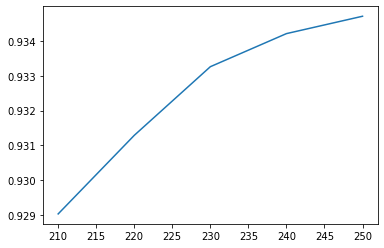

In [78]:
import matplotlib.pyplot as plt
score = []
for i in range(250,200,-10):
    X_fschi = SelectKBest(chi2, k=i).fit_transform(X_fsvar, y)
    once = cross_val_score(RandomForestClassifier(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()
    score.append(once)
plt.plot(range(250,200,-10),score)
plt.show()

In [79]:
chivalue, pvalues_chi = chi2(X_fsvar,y)
chivalue

array([1433554.26798015, 1429043.15373433, 1332663.17213405,
       1625807.41495542, 1630206.90922916, 1630597.02883804,
       1633456.72909664, 1610816.75571229, 1483382.49543886,
       1256290.1574794 ,  951236.1617682 ,  693192.66191748,
       1269945.07968831, 1221758.57688808, 1146535.17810241,
       1080657.20185303, 1079065.30979135, 1092222.70610032,
       1064908.45385716, 1023327.00231067,  974163.15420165,
        918857.12860617,  861439.52030749,  657819.3908855 ,
        599159.21961671,  576483.60795847,  559848.1818137 ,
        536985.56062372,  561457.57734769,  594428.19185935,
        592414.89830452,  587801.84097643,  672232.60135169,
        790511.70530618,  866573.70991777,  891422.58050934,
        641105.0929774 ,  632098.97938142,  725189.43548604,
        853879.48154986,  863895.50862873,  709440.99808713,
        615099.361498  ,  660082.35138802,  662040.13166049,
        647432.43321103,  718070.06251003,  868119.93550552,
        995128.78948214,

In [80]:
pvalues_chi

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### F检验

检测特征与标签之间是否有线性关系

In [81]:
from sklearn.feature_selection import f_classif

In [83]:
F, p = f_classif(X_fsvar, y)
F

array([1200.99190762, 1209.29489877, 1110.4944286 , 1424.49864852,
       1569.26556677, 1742.49910702, 1910.98023795, 1969.20520223,
       1731.37475948, 1295.09668012,  839.15325001,  531.97951763,
       1086.0472161 , 1177.72017709, 1253.79641973, 1344.06961068,
       1507.33781169, 1616.50454434, 1512.25864876, 1289.65180587,
       1051.26276412,  839.48869386,  680.07426932,  515.7498157 ,
        532.86107778,  594.62512658,  664.18740444,  709.37133696,
        798.11767931,  876.69849088,  852.76926441,  785.70173347,
        802.88980095,  813.2041131 ,  760.85552527,  687.94148028,
        476.23046034,  536.72332365,  740.12587382, 1041.38089649,
       1168.8028973 ,  941.91083922,  795.72843454,  861.29818828,
        868.19464432,  838.80173567,  886.26659655,  959.12740961,
        934.56890789,  783.1988476 ,  657.20547321,  981.66873526,
       1465.82267956, 1756.05831022, 1385.28086085,  798.73125604,
        761.40508874, 1062.6919609 ,  979.38193965,  947.82602

In [84]:
p

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [85]:
# p值大于0.05拒绝原假设，F检验原假设为特征与标签显著线性相关
k = F.shape[0] - (p > 0.05).sum()

In [86]:
k

261

## 互信息法
检测特征与标签之前的任何关系，0代表两个变量独立，1代表两个变量完全相关

In [89]:
from sklearn.feature_selection import mutual_info_classif as MIC

In [90]:
result = MIC(X_fsvar, y)
result

array([0.16464777, 0.17039638, 0.14877006, 0.15201399, 0.17948738,
       0.20443589, 0.22621755, 0.23068017, 0.22182767, 0.18014634,
       0.1393084 , 0.10496288, 0.12018338, 0.14107803, 0.1478493 ,
       0.1601772 , 0.1771884 , 0.1881098 , 0.17632808, 0.15544731,
       0.13785701, 0.11209763, 0.09967391, 0.08395678, 0.09526003,
       0.10054395, 0.11409294, 0.10609254, 0.11594668, 0.11925878,
       0.12188769, 0.11180155, 0.11427548, 0.11767441, 0.11043259,
       0.09405475, 0.07763607, 0.09114352, 0.11490271, 0.1430405 ,
       0.1457611 , 0.11983108, 0.11038255, 0.12261127, 0.11325983,
       0.11450383, 0.12722275, 0.14128231, 0.12314701, 0.10336112,
       0.0968835 , 0.1358363 , 0.18647531, 0.20455954, 0.15784041,
       0.10762345, 0.10498656, 0.1268229 , 0.11578533, 0.13237192,
       0.14428386, 0.15489142, 0.13831257, 0.12008827, 0.12536496,
       0.17558366, 0.22131725, 0.19107452, 0.12015322, 0.07451139,
       0.11236347, 0.14385201, 0.1199244 , 0.13119526, 0.16252

In [91]:
k = result.shape[0] - sum(result <= 0)

# 嵌入法

In [92]:
from sklearn.feature_selection import SelectFromModel

rfc = RandomForestClassifier(n_estimators=10, random_state=0)
x_embedded = SelectFromModel(rfc, threshold=0.005).fit_transform(x,y)
x_embedded.shape

(42000, 51)

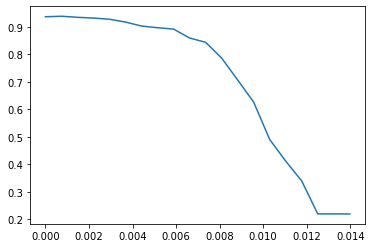

In [96]:
import numpy as np
import matplotlib.pyplot as plt


rfc.fit(x,y).feature_importances_

threshold = np.linspace(0,(rfc.fit(x,y).feature_importances_).max(),20)
score = []

for i in threshold:
    x_embedded = SelectFromModel(rfc,threshold=i).fit_transform(x,y)
    once = cross_val_score(rfc,x_embedded,y,cv=5).mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [98]:
x_embedded = SelectFromModel(rfc, threshold=0.002).fit_transform(x,y)
x_embedded.shape

(42000, 175)

In [99]:
cross_val_score(rfc, x_embedded, y, cv=5).mean()

0.9314761904761906

# 包装法

In [100]:
from sklearn.feature_selection import RFE

rfc = RandomForestClassifier(n_estimators=10, random_state=0)
selector = RFE(rfc, n_features_to_select=340, step=50).fit(x, y)

In [101]:
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,

In [103]:
selector.ranking_

array([9, 8, 7, 7, 7, 7, 7, 7, 6, 6, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 6, 6,
       7, 7, 7, 7, 7, 7, 6, 7, 7, 6, 5, 4, 4, 6, 3, 3, 5, 6, 5, 5, 4, 6,
       6, 6, 7, 7, 7, 7, 6, 7, 6, 5, 4, 4, 4, 3, 1, 1, 1, 1, 1, 1, 3, 1,
       2, 4, 6, 5, 6, 7, 7, 8, 8, 7, 8, 6, 5, 4, 3, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 5, 4, 5, 8, 8, 8, 8, 6, 5, 4, 3, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 5, 9, 9, 9, 9, 6, 5, 5, 3, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 6, 8, 9, 9,
       9, 5, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 9, 9, 9, 9, 7, 5, 4, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 6, 9, 9, 9, 7, 6, 4, 3, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 4, 5, 9, 9, 9, 8, 6, 4, 4, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 9, 9, 9,
       9, 9, 9, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 5, 5, 6, 8, 9, 9, 9, 5, 4, 3, 1, 1, 1, 1,

In [104]:
x_wrapper = selector.transform(x)

In [105]:
cross_val_score(rfc, x_wrapper, y, cv = 5).mean()

0.9385476190476192